## Versi 1

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import pairwise_distances

In [39]:
# Data
df_cleaned = pd.read_csv(r'tweets-data\cleaned.csv')

#slicing
df_cleaned = df_cleaned.iloc[1500:,:]
df_cleaned

,created_at,full_text,location,mentions,tokens,stemmed_tokens,clean_text
1500,Tue Sep 17 07:49:29 +0000 2024,jadi ani ani oknum aparat atau pejabat,Ⓘⓝⓓⓞⓝⓔⓢⓘⓐ,['@gilbhas'],"['ani', 'ani', 'oknum', 'aparat', 'pejabat']","['ani', 'ani', 'oknum', 'aparat', 'jabat']",ani ani oknum aparat jabat
1501,Tue Sep 17 07:49:14 +0000 2024,Hahahhaha di kiranya rakyat pada goblok kali o...,NaN,['@islah_bahrawi'],"['Hahahhaha', 'rakyat', 'goblok', 'kali', 'ota...","['hahahhaha', 'rakyat', 'goblok', 'kali', 'ota...",hahahhaha rakyat goblok kali otak kaya fufufafa
1502,Tue Sep 17 07:49:00 +0000 2024,Kalau hukum itu ada gratifikasi bisa bikin Bap...,Little castle,[],"['hukum', 'gratifikasi', 'bikin', 'Bapaknya', ...","['hukum', 'gratifikasi', 'bikin', 'bapak', 'fu...",hukum gratifikasi bikin bapak fufufafa bungkus...
1503,Tue Sep 17 07:48:58 +0000 2024,emg urgensi nya apa ngusut fufufafa knp nggk n...,Nusantara,['@neVerAl0nely'],"['emg', 'urgensi', 'nya', 'ngusut', 'fufufafa'...","['emg', 'urgensi', 'nya', 'ngusut', 'fufufafa'...",emg urgensi nya ngusut fufufafa knp nggk nguru...
1504,Tue Sep 17 07:48:54 +0000 2024,Stlh disumpah ada tanggungjawab besar dipundak...,NaN,"['@bengkeldodo', '@prabowo']","['Stlh', 'disumpah', 'tanggungjawab', 'dipunda...","['stlh', 'sumpah', 'tanggungjawab', 'pundak', ...",stlh sumpah tanggungjawab pundak kpd rakyatamp...
...,...,...,...,...,...,...,...
1998,Tue Sep 17 04:35:55 +0000 2024,stop calling me fufufafa pleaseeeee,NaN,[],"['stop', 'calling', 'me', 'fufufafa', 'pleasee...","['stop', 'calling', 'me', 'fufufafa', 'pleasee...",stop calling me fufufafa pleaseeeee
1999,Tue Sep 17 04:35:20 +0000 2024,Nah ini tepat penamaan Prof Fufufafa utk,"Banten, Indonesia","['@msaid_didu', '@JimlyAs']","['penamaan', 'Prof', 'Fufufafa', 'utk']","['nama', 'prof', 'fufufafa', 'utk']",nama prof fufufafa utk
2000,Tue Sep 17 04:35:09 +0000 2024,Kirim Mulyono dan Fufufafa ke negara hoax sire...,NaN,['@CutSarina5'],"['Kirim', 'Mulyono', 'Fufufafa', 'negara', 'ho...","['kirim', 'mulyono', 'fufufafa', 'negara', 'ho...",kirim mulyono fufufafa negara hoax sirewel aj ...
2001,Tue Sep 17 04:34:48 +0000 2024,Fufufafa kenapa mukanya gitu sih,NaN,['@Rexthatch'],"['Fufufafa', 'mukanya', 'gitu', 'sih']","['fufufafa', 'muka', 'gitu', 'sih']",fufufafa muka gitu sih


In [40]:
df_cleaned = df_cleaned.dropna(subset=['clean_text'])

# Menggunakan stopwords bahasa Indonesia dari `scikit-learn`
stopwords_id = ["yang", "dan", "di", "ke", "dari", "pada", "untuk", "dengan", "seperti", "adalah", "juga", "ini", "itu", "itu", "pada", "saat"]

# Inisialisasi CountVectorizer dengan stopwords bahasa Indonesia
vectorizer = CountVectorizer(stop_words=stopwords_id)
X = vectorizer.fit_transform(df_cleaned['clean_text'])

In [41]:
# Banyak dokumen (baris) dan fitur (kata unik) yang ada setelah proses BoW
print(X.shape)

(503, 1857)


In [42]:
# 10 kata pertama dalam vocabulary yang dihasilkan oleh CountVectorizer
print(vectorizer.get_feature_names_out()[:10])

['abah' 'abang' 'abdul' 'abis' 'aceh' 'acung' 'ad' 'ada' 'adaada' 'adab']


In [43]:
# Step 3: Apply LDA model using Scikit-learn's LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Step 4: Display the topics
# Get the words for each topic
words = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx}:")
    print([words[i] for i in topic.argsort()[-20:]])  # Top 10 words for each topic

Topic 0:
['gadungan', 'bikin', 'hp', 'bukti', 'lu', 'jokowi', 'suka', 'kerja', 'fokus', 'pks', 'gue', 'gak', 'udah', 'kalo', 'akun', 'yg', 'gibran', 'ya', 'ga', 'fufufafa']
Topic 1:
['gak', 'raka', 'rakabuming', 'emang', 'cuit', 'hina', 'fokus', 'kerja', 'duga', 'aja', 'si', 'netizen', 'fitnah', 'prabowo', 'nya', 'milik', 'yg', 'gibran', 'akun', 'fufufafa']
Topic 2:
['kerja', 'anak', 'diam', 'nyerang', 'dukung', 'fokus', 'hina', 'subianto', 'dombaisu', 'total', 'solid', 'upaya', 'gagal', 'pks', 'adu', 'yg', 'gibran', 'akun', 'prabowo', 'fufufafa']
Topic 3:
['satu', 'serang', 'dah', 'gibran', 'haram', 'kalo', 'orang', 'libur', 'puncak', 'viralvideo', 'tolol', 'gak', 'yg', 'akun', 'konstitusi', 'labubu', 'anak', 'rakyat', 'dukung', 'fufufafa']
Topic 4:
['jalur', 'pecah', 'tdk', 'prabowo', 'ya', 'bikin', 'belah', 'kaskus', 'ga', 'orang', 'indonesia', 'prabowogibran', 'fitnah', 'yg', 'aja', 'fokus', 'kerja', 'akun', 'gibran', 'fufufafa']


In [44]:
# Step 5: Calculate Perplexity for LDA Model
# Perplexity measures how well the model predicts the data. Lower perplexity indicates better performance.
perplexity = lda_model.perplexity(X)
print(f"Model Perplexity: {perplexity}")

# Step 6: Calculate Coherence Score
# Coherence measures the interpretability of the topics by checking how frequently the top words of each topic appear together.

def coherence_score(lda_model, X, vectorizer, top_n=10):
    # Get topic-word distributions
    topic_word_matrix = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
    vocabulary = np.array(vectorizer.get_feature_names_out())

    # Compute pairwise distances between the top words of each topic
    coherence_scores = []
    for topic_idx, topic in enumerate(topic_word_matrix):
        top_words = vocabulary[np.argsort(topic)[-top_n:]]  # Get top_n words for each topic
        top_word_vectors = X[:, [vectorizer.vocabulary_[word] for word in top_words]].toarray()
        # Calculate pairwise cosine similarity
        topic_coherence = np.mean(pairwise_distances(top_word_vectors, metric="cosine"))
        coherence_scores.append(topic_coherence)

    return np.mean(coherence_scores)

coherence = coherence_score(lda_model, X, vectorizer)
print(f"Coherence Score: {coherence}")


Model Perplexity: 1119.675773438653
Coherence Score: 0.5581844633023536


## Versi 2

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Step 2: Membuat BoW menggunakan CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords_id)
X = vectorizer.fit_transform(df_cleaned['clean_text'])

# Tampilkan Bag of Words
print("=== Bag of Words ===")
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).head())

=== Bag of Words ===
   abah  acung  ad  adaada  adab  adi  adik  adil  adu  agam  ...  yaudah  yg  \
0     0      0   0       0     0    0     0     0    0     0  ...       0   0   
1     0      0   0       0     0    0     0     0    0     0  ...       0   0   
2     0      0   0       0     0    0     0     0    0     0  ...       1   0   
3     0      0   0       0     0    0     0     0    0     0  ...       0   2   
4     0      0   0       0     0    0     0     1    0     0  ...       0   0   

   yh  yogya  you  youtube  yuk  zaman  zonajajan  zonauang  
0   0      0    0        0    0      0          0         0  
1   0      0    0        0    0      0          0         0  
2   0      0    0        0    0      0          0         0  
3   0      0    0        0    0      0          0         0  
4   0      0    0        0    0      0          0         0  

[5 rows x 737 columns]


In [47]:
# Step 3: Train LDA model with different components
perplexities = []
coherence_scores = []
n_topics_range = range(2, 11)  # Range of topics to evaluate

for n_topics in n_topics_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X)
    
    # Calculate perplexity
    perplexity = lda_model.perplexity(X)
    perplexities.append(perplexity)

    # Calculate coherence score
    words = vectorizer.get_feature_names_out()
    
    def calculate_coherence_score(lda_model, X, words, n_top_words=10):
        topics = lda_model.components_
        top_words_per_topic = []

        for topic_idx, topic in enumerate(topics):
            top_word_indices = topic.argsort()[-n_top_words:]
            top_words_per_topic.append([words[i] for i in top_word_indices])

        # Simple Coherence Calculation (pairwise word co-occurrence within topics)
        coherence_scores = []
        for words_in_topic in top_words_per_topic:
            pairs = [(words_in_topic[i], words_in_topic[j]) for i in range(len(words_in_topic)) for j in range(i + 1, len(words_in_topic))]
            score = np.mean([cohen_kappa_score(X[:, vectorizer.vocabulary_[pair[0]]].toarray(), 
                                               X[:, vectorizer.vocabulary_[pair[1]]].toarray()) 
                             for pair in pairs if pair[0] in vectorizer.vocabulary_ and pair[1] in vectorizer.vocabulary_])
            coherence_scores.append(score)

        return np.mean(coherence_scores)

    coherence_score = calculate_coherence_score(lda_model, X, words)
    coherence_scores.append(coherence_score)

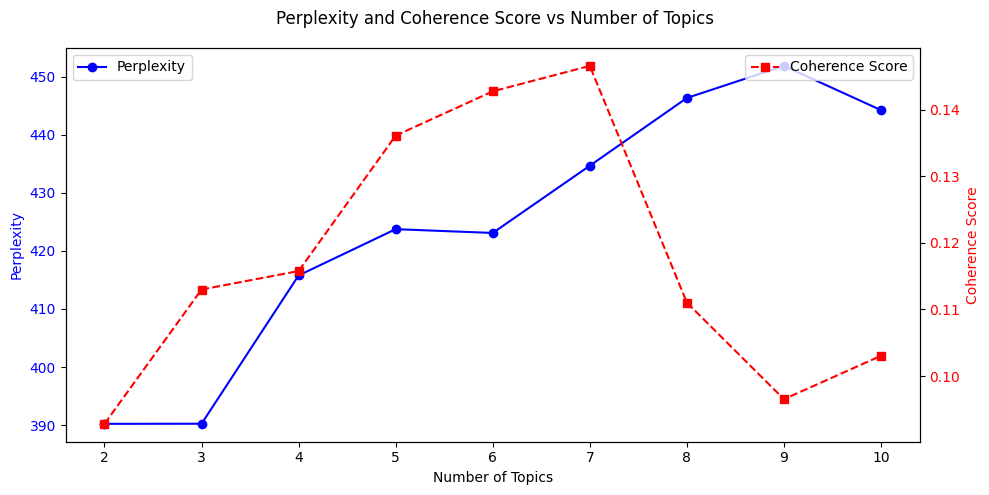


=== LDA Topics ===
Topic 1:
['nya', 'prabowogibran', 'ga', 'dukung', 'kaskus', 'rakyat', 'fitnah', 'fokus', 'kerja', 'fufufafa']
Topic 2:
['total', 'dombaisu', 'solid', 'gagal', 'upaya', 'akun', 'adu', 'prabowo', 'gibran', 'fufufafa']
Topic 3:
['ya', 'tdk', 'akun', 'nyerang', 'si', 'berani', 'ga', 'pks', 'yg', 'fufufafa']
Topic 4:
['negara', 'hina', 'aja', 'mulyono', 'gibran', 'yg', 'milik', 'anak', 'akun', 'fufufafa']
Topic 5:
['bukti', 'ya', 'fitnah', 'aja', 'fokus', 'kerja', 'yg', 'gibran', 'akun', 'fufufafa']

=== Evaluation Results ===
   Number of Topics  Perplexity  Coherence Score
0                 2  390.225188         0.092837
1                 3  390.241077         0.112988
2                 4  415.774829         0.115763
3                 5  423.740202         0.136086
4                 6  423.088889         0.142728
5                 7  434.666667         0.146547
6                 8  446.329770         0.111023
7                 9  451.851634         0.096531
8          

In [48]:
# Step 4: Visualize Perplexity and Coherence Score
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Perplexity and Coherence Score
ax1.plot(n_topics_range, perplexities, marker='o', color='b', label='Perplexity')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(n_topics_range, coherence_scores, marker='s', color='r', linestyle='--', label='Coherence Score')
ax2.set_ylabel('Coherence Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Perplexity and Coherence Score vs Number of Topics')
fig.tight_layout()

# Add a legend for each axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Step 5: Display the topics from the final LDA model (with best n_components)
best_n_topics = 5  # Choose the best number based on the graphs
lda_model = LatentDirichletAllocation(n_components=best_n_topics, random_state=42)
lda_model.fit(X)

# Display the topics
words = vectorizer.get_feature_names_out()
print("\n=== LDA Topics ===")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])  # Top 10 words for each topic

# Step 6: Create a DataFrame for the results
results_df = pd.DataFrame({
    'Number of Topics': n_topics_range,
    'Perplexity': perplexities,
    'Coherence Score': coherence_scores
})

# Display the table
print("\n=== Evaluation Results ===")
print(results_df)

Model Perplexity: Perplexity yang lebih rendah menunjukkan bahwa model lebih baik dalam memprediksi data.

Coherence Score: Semakin tinggi nilai koherensi (mendekati 1), semakin baik topik yang dihasilkan.